# Analyzing and Visualizing Data 

In [1]:
import json
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import os
from sqlalchemy import create_engine
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
from PIL import Image
from io import BytesIO

In [2]:
df_clean = pd.read_csv('twitter_archive_master.csv')

## Popular Dog Breeds

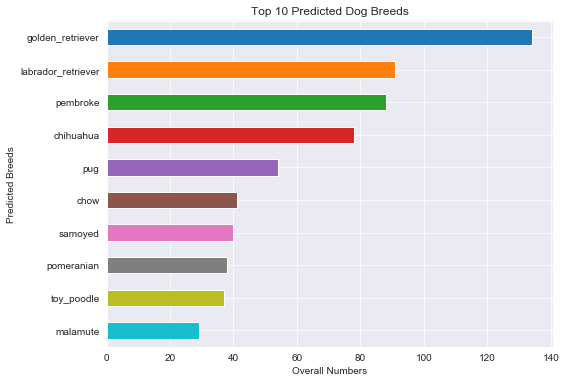

In [3]:
plt.figure(figsize=(8,6));
df_dog_breeds = df_clean.query('p1_dog == True')
df_dog_breeds.p1.value_counts()[0:10].plot(kind='barh');
plt.gca().invert_yaxis();  #fix the upside-down issue 
plt.xlabel('Overall Numbers')
plt.ylabel('Predicted Breeds')
plt.title('Top 10 Predicted Dog Breeds');

We create a horizontal bar plot by using the neural network prediction results. The top 3 most common dog breeds are Golden Retriever, Labrador Retriever, and Pembroke (Corgi). The number of Golden Retriever is about 135, which is much higher than the other breeds. 

## Popular Dog Names

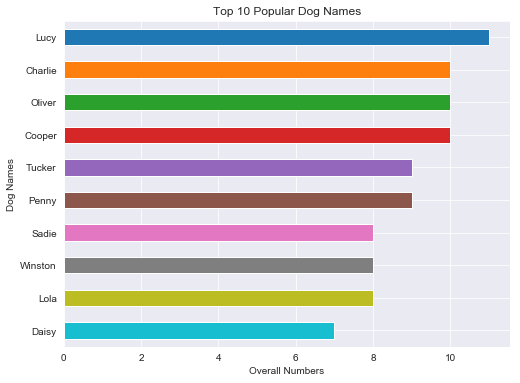

In [4]:
plt.figure(figsize=(8,6));
df_clean.name.value_counts()[0:10].plot(kind='barh');
plt.gca().invert_yaxis();
plt.xlabel('Overall Numbers')
plt.ylabel('Dog Names')
plt.title('Top 10 Popular Dog Names');

Based on the wrangled data, we can also check out the most popular dog names. The top 3 most popular names are Lucy, Cliver, and Charlie. 

## Favorite counts and Retweet counts

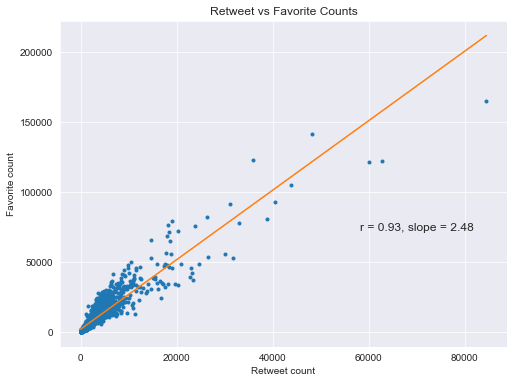

In [5]:
y = df_clean['favorite_count']
x = df_clean['retweet_count']

#generate linear fit line
xi = np.arange(0,df_clean['retweet_count'].max()+10)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope * xi + intercept

plt.figure(figsize=(8,6));
plt.plot(x, y, 'o',xi, line, markersize=3);
plt.text(70000, 75000,'r = {}, slope = {}'.format(np.around(r_value, 2), np.around(slope, 2)), horizontalalignment='center',
     verticalalignment='center', fontsize=12);
plt.xlabel('Retweet count')
plt.ylabel('Favorite count')
plt.title('Retweet vs Favorite Counts');

It does not surprise me that the favorite counts and retweet counts are correlated. Actually they are strong correlated as the r value is 0.93. 
<br>
For each tweet, the number of the favorites is about 3 times as the number of retweets. It makes sense because people tend to click “favorite” button rather than retweeting. 

## Dog Rating and Favorite counts

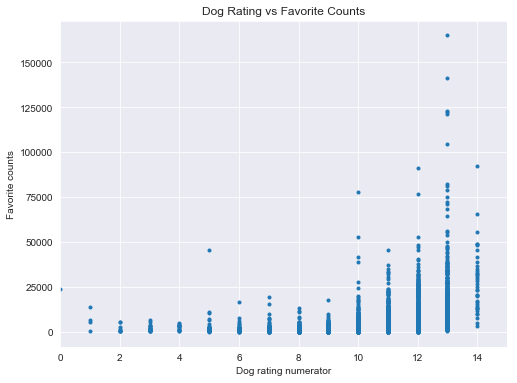

In [6]:
y = df_clean['favorite_count']
x = df_clean['rating_numerator']

plt.figure(figsize=(8,6));
plt.plot(x, y, 'o', markersize=3);
plt.xlabel('Dog rating numerator')
plt.ylabel('Favorite counts')
plt.title('Dog Rating vs Favorite Counts');
plt.xlim(0, 15);

The dog rating does mean something! Those dog tweets received higher than 10 rate get much more favorites. It is also interesting that the top 5 favorite counts belong to dog rate of 13 rather than 14 (out of 10). 

## Neural Network Prediction Accuracy

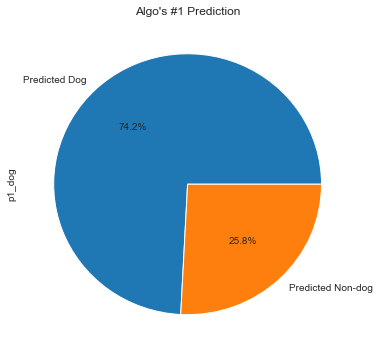

In [7]:
plt.figure(figsize=(6,6));
df_clean.p1_dog.value_counts().plot.pie(labels = ['Predicted Dog', 'Predicted Non-dog'], autopct = '%.1f%%')
plt.title("Algo's #1 Prediction");

The accuracy of the dog / non-dog classification neural network is about 72% (it is quite safe to assume all the pictures are about dogs). 72% does not seem to be a very good accuracy. 
<br>
Let’s take a look at 5 mislabeled dogs’ pictures: 

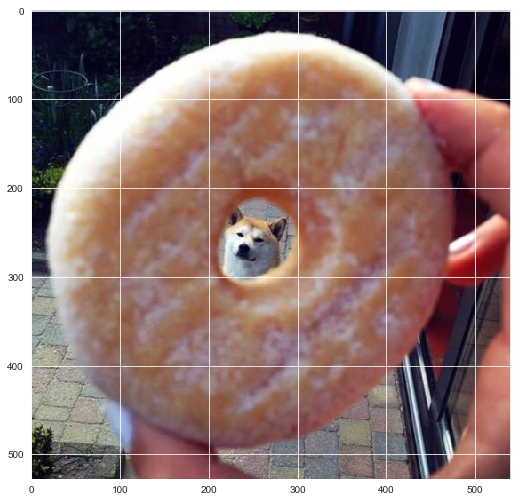

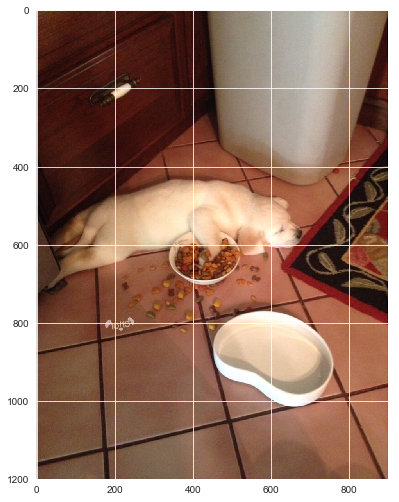

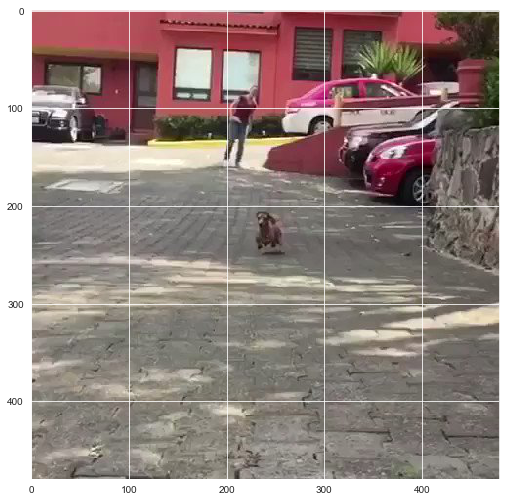

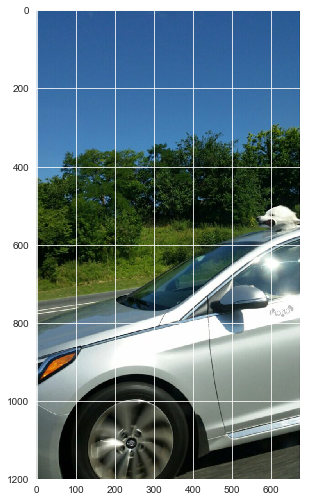

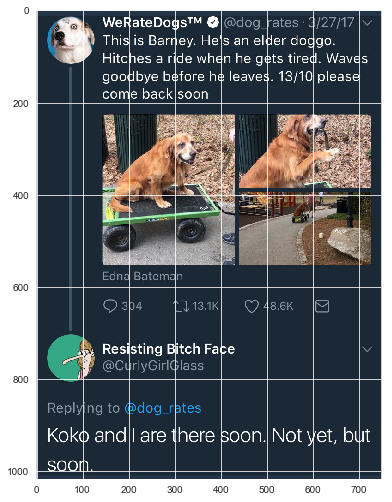

In [8]:
url_list = df_clean[df_clean.p1_dog == False]['jpg_url'].head()
i = 0
for url in url_list:
    i += 1
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(50, 50))
    plt.subplot(len(url_list), 1, i)
    plt.imshow(img, interpolation='nearest')    

A few types of images the dogs tend to be mislabeled include:

    - Dog body in an unusual position
    - Dog is very small in the picture (scale variation)
    - Camera Angle
    - Some other items appear at the center of the picture

Likely this neural network was trained base on the online ‘perfect’ animal pictures. However, twitter uses like to take pictures of their dogs in a ‘funny’ way. 